In [1]:
# creating the decision boundary for the KNN

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [7]:
x = data.iloc[:,2:4]
y = data.iloc[:,4]

In [9]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0, train_size=0.80)

In [13]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [19]:
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [40]:
# Creating the meshgrid

In [41]:
# arange is function in the numpy that create array. It take the starting value and the stop value and jump value.
# here start value = from the (min of the 0th row) -1  it will start.
# stop at the max value +1  of the 0th row of the x_train 
# and will take the step of the 0.01
a = np.arange(start = x_train[:,0].min()-1, stop=x_train[:,0].max()+1, step=0.01)

In [42]:
a.shape

(609,)

In [43]:
b= np.arange(start = x_train[:,1].min()-1, stop=x_train[:,1].max()+1, step=0.01)

In [44]:
b.shape

(592,)

In [45]:
# creating the meshgrid
# xx contaning all the age value 
# yy contain all the salary value 
xx,yy=np.meshgrid(a,b)

In [46]:

xx.shape

(592, 609)

In [47]:
yy.shape

(592, 609)

In [48]:
# total customer we have
592*609

360528

In [49]:
# age data of the first customer
xx[0][0] 

-2.965479779000691

In [50]:
# salary data of the first customer
yy[0][0]

-2.5913815646031484

In [54]:
# classify the every point from the meshgrid
knn.predict(np.array([-2.965479779000691, -2.5913815646031484]).reshape(1,2))
# now we need to do this prediction for the all 3lakh+ customers so, below how we will do it


array([0], dtype=int64)

In [62]:
# this cell show how revel work
# ravel() is numpy function that convert the high-dimension array to 1D array
m = np.array([[1,2,3,4], [5,6,7,8]])
n = np.array([[0,9,8,7], [6,5,4,3]])
# now the m, n are the 2D list

np.array([m.ravel(), n.ravel()])
# look how the 2D array m merges to form 1D , similar for the n

array([[1, 2, 3, 4, 5, 6, 7, 8],
       [0, 9, 8, 7, 6, 5, 4, 3]])

In [63]:
# now we will create a array that have two columns xx and yy
np.array([xx.ravel(), yy.ravel()]).shape
# there are 2 rows and columns are 360528

(2, 360528)

In [67]:
# But we need the rows as customer and columns as age and salary. So, we need to transpose this.
new_array = np.array([xx.ravel(), yy.ravel()]).T

In [69]:
# now sending it for the prediction
labels = knn.predict(new_array)

In [70]:
# plotting the array as an image

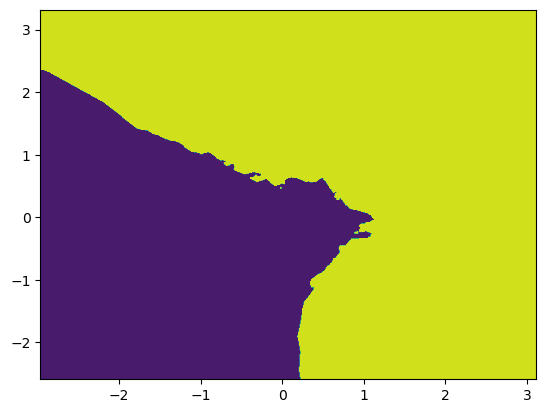

In [79]:
# contour have condition that shape of all xx,yy,labels should be same. So we need to reshape the labels in oreder of (592,609)
plt.contourf(xx,yy,labels.reshape(xx.shape))

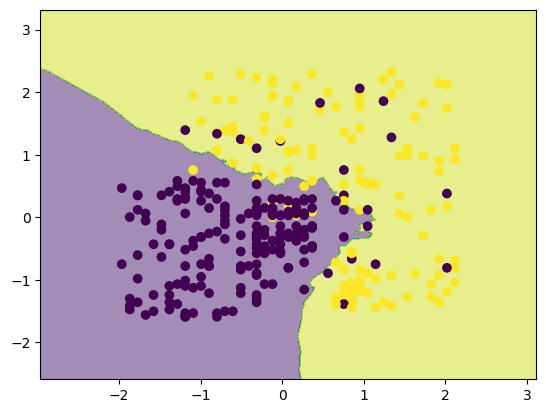

In [83]:
plt.contourf(xx,yy,labels.reshape(xx.shape), alpha=0.5)
plt.scatter(x_train[:,0],x_train[:,1], c=y_train)
# now the purple point in green reagion and yellow in purple region is errors